## Installation

In [ ]:
!git clone https://github.com/Unity-Technologies/ml-agents.git
!git -C ml-agents checkout 0.4.0b
!pip install ml-agents/python/.
!ln -s ml-agents/python/unityagents/ unityagents


## Setup

In [1]:
import sys
sys.path.append('/Users/O0SA/Documents/git/banana-collector/ml-agents/python/')

from unityagents import UnityEnvironment
from badaii.rl.agents.double_dqn import Agent
import numpy as np
import matplotlib.pyplot as plt 

## Environment

In [2]:
env = UnityEnvironment('data/Banana.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Agent

In [3]:
agent = Agent(restore='saved_models/model_dqn.ckpt')

In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

action_size = brain.vector_observation_space_size

## Helpers

In [5]:
def env_reset(env, brain_name):
    env_info = env.reset(train_mode=True)[brain_name]
    return env_info.vector_observations[0]

In [6]:
def env_step(env, brain_name, action):
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    
    return (next_state, reward, done)

## Results

In [7]:
scores = []

for ep_i in range(100):
    score = 0 
    state = env_reset(env, brain_name)
    while True: 
        action = agent.act(state)
        next_state, reward, done = env_step(env, brain_name, action)
        score += reward
        state = next_state
        if done: 
            break
    scores.append(score)

In [8]:
env.close()

In [10]:
np.mean(scores)

16.93

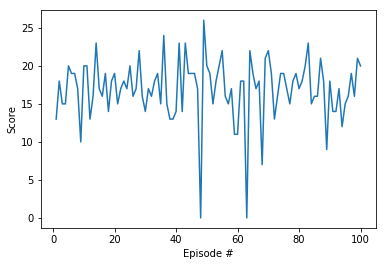

In [19]:
plt.plot(np.arange(1,101), scores)
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()